In [34]:
from sqlalchemy import create_engine
import pandas as pd
from decouple import config

DATABASE_URL = config('DATABASE_URL')
engine = create_engine(DATABASE_URL)

In [45]:
df = pd.read_sql_query('select * from "shoes"',con=engine)

In [46]:
df

,id,name,price,free_shipping,total_images,seller_rating,url,model,shoe_size,adult_shoe,youth_shoe,child_shoe,sold,item_description,item_offer_info,item_bid_info,desc_fre_score,desc_avg_grade_score,sold_date
0,1224,Details about Sacai x KAWS x Nike Blazer Low...,170.00,False,6,32,https://www.ebay.com/itm/175050561094?hash=ite...,Sacai x KAWS x Nike Blazer Low,10.0,True,False,False,True,sacai x kaws x nike blazer low red size brand ...,None,None,100,6,2021-12-05
1,1225,Details about Nike Blazer Low x sacai x KAWS...,180.00,True,13,8,https://www.ebay.com/itm/194546871771?hash=ite...,Sacai x KAWS x Nike Blazer Low,8.0,True,False,False,True,nike blazer low x sacai x kaws team red chitos...,None,None,-29,40,2021-12-05
2,1226,Details about Size 13 Mens Nike KAWS x sacai...,195.00,False,2,20,https://www.ebay.com/itm/165214297323?hash=ite...,Sacai x KAWS x Nike Blazer Low,13.0,True,False,False,True,size men nike kaws x sacai x blazer low team,None,None,104,4,2021-12-05
3,1227,Details about Sacai x KAWS x Nike Blazer Low...,187.00,False,2,8,https://www.ebay.com/itm/165212102183?hash=ite...,Sacai x KAWS x Nike Blazer Low,9.0,True,False,False,True,sacai x kaws x nike blazer low red size new box,None,None,103,4,2021-12-05
4,1228,Details about Sacai x KAWS x Nike Blazer Low...,199.00,True,8,689,https://www.ebay.com/itm/133953233635?hash=ite...,Sacai x KAWS x Nike Blazer Low,10.0,True,False,False,True,brand new box free shipping please let know qu...,None,None,86,7,2021-12-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,1502,sacai kaws nike blazer low red dm size,210.00,False,8,78,https://www.ebay.com/itm/224738124434?hash=ite...,Sacai x KAWS x Nike Blazer Low,10.0,True,False,False,False,sacai x kaws x nike blazer low red size,True,False,105,3,NaT
314,1503,nike blazer low sacai kaws red size dm,190.00,False,7,7,https://www.ebay.com/itm/353786853897?hash=ite...,Sacai x KAWS x Nike Blazer Low,10.5,True,False,False,False,nike blazer low sacai kaws red size,True,False,107,4,NaT
315,1504,new nike kaws sacai blazer low team red dm uni...,209.99,False,7,382,https://www.ebay.com/itm/203750931981?hash=ite...,Sacai x KAWS x Nike Blazer Low,11.5,True,False,False,False,sale nike x sacai x kawsblazer lowteam red hot...,True,False,-7,33,NaT
316,1505,nike kaws sacai blazer low team red white dm s...,215.00,True,5,553,https://www.ebay.com/itm/304247927111?hash=ite...,Sacai x KAWS x Nike Blazer Low,11.5,True,False,False,False,nike x kaws x sacai blazer lowteam redsize new...,True,False,58,13,NaT


In [47]:
df = df.drop(columns=['id', 'name', 'item_description', 'item_offer_info', 'item_bid_info', 'model', 'url', 'sold_date'])

In [48]:
df

,price,free_shipping,total_images,seller_rating,shoe_size,adult_shoe,youth_shoe,child_shoe,sold,desc_fre_score,desc_avg_grade_score
0,170.00,False,6,32,10.0,True,False,False,True,100,6
1,180.00,True,13,8,8.0,True,False,False,True,-29,40
2,195.00,False,2,20,13.0,True,False,False,True,104,4
3,187.00,False,2,8,9.0,True,False,False,True,103,4
4,199.00,True,8,689,10.0,True,False,False,True,86,7
...,...,...,...,...,...,...,...,...,...,...,...
313,210.00,False,8,78,10.0,True,False,False,False,105,3
314,190.00,False,7,7,10.5,True,False,False,False,107,4
315,209.99,False,7,382,11.5,True,False,False,False,-7,33
316,215.00,True,5,553,11.5,True,False,False,False,58,13


In [49]:
df = df.drop(columns=['adult_shoe', 'youth_shoe', 'child_shoe'])

In [50]:
df["free_shipping"] = df["free_shipping"].astype(int)
# df["adult_shoe"] = df["adult_shoe"].astype(int)
# df["youth_shoe"] = df["youth_shoe"].astype(int)
# df["child_shoe"] = df["child_shoe"].astype(int)
df["sold"] = df["sold"].astype(int)

In [51]:
df

,price,free_shipping,total_images,seller_rating,shoe_size,sold,desc_fre_score,desc_avg_grade_score
0,170.00,0,6,32,10.0,1,100,6
1,180.00,1,13,8,8.0,1,-29,40
2,195.00,0,2,20,13.0,1,104,4
3,187.00,0,2,8,9.0,1,103,4
4,199.00,1,8,689,10.0,1,86,7
...,...,...,...,...,...,...,...,...
313,210.00,0,8,78,10.0,0,105,3
314,190.00,0,7,7,10.5,0,107,4
315,209.99,0,7,382,11.5,0,-7,33
316,215.00,1,5,553,11.5,0,58,13


### Filling Missing Values

In [53]:
price_fillna_value = round(df["price"].mean(),2)
free_shipping_fillna_value = int(df["free_shipping"].mean())
total_images_fillna_value = int(df["total_images"].mean())
seller_rating_fillna_value = int(df["seller_rating"].mean())
shoe_size_fillna_value = int(df["shoe_size"].mean())
# adult_shoe_fillna_value = int(df["adult_shoe"].mean())
# youth_shoe_fillna_value = int(df["youth_shoe"].mean())
# child_shoe_fillna_value = int(df["child_shoe"].mean())

df["price"].fillna(price_fillna_value,inplace=True)
df["free_shipping"].fillna(free_shipping_fillna_value,inplace=True)
df["total_images"].fillna(total_images_fillna_value,inplace=True)
df["seller_rating"].fillna(seller_rating_fillna_value,inplace=True)
df["shoe_size"].fillna(shoe_size_fillna_value,inplace=True)
# df["adult_shoe"].fillna(adult_shoe_fillna_value,inplace=True)
# df["youth_shoe"].fillna(youth_shoe_fillna_value,inplace=True)
# df["child_shoe"].fillna(child_shoe_fillna_value,inplace=True)


df

,price,free_shipping,total_images,seller_rating,shoe_size,sold,desc_fre_score,desc_avg_grade_score
0,170.00,0,6,32,10.0,1,100,6
1,180.00,1,13,8,8.0,1,-29,40
2,195.00,0,2,20,13.0,1,104,4
3,187.00,0,2,8,9.0,1,103,4
4,199.00,1,8,689,10.0,1,86,7
...,...,...,...,...,...,...,...,...
313,210.00,0,8,78,10.0,0,105,3
314,190.00,0,7,7,10.5,0,107,4
315,209.99,0,7,382,11.5,0,-7,33
316,215.00,1,5,553,11.5,0,58,13


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 318 non-null    float64
 1   free_shipping         318 non-null    int64  
 2   total_images          318 non-null    int64  
 3   seller_rating         318 non-null    int64  
 4   shoe_size             318 non-null    float64
 5   sold                  318 non-null    int64  
 6   desc_fre_score        318 non-null    int64  
 7   desc_avg_grade_score  318 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 20.0 KB


In [55]:
df.describe()

,price,free_shipping,total_images,seller_rating,shoe_size,sold,desc_fre_score,desc_avg_grade_score
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,193.444969,0.301887,6.138365,248.990566,10.349566,0.283019,69.880503,11.094340
std,40.181245,0.459800,3.291281,463.691725,2.033528,0.451175,48.951964,11.618159
min,100.000000,0.000000,2.000000,0.000000,3.500000,0.000000,-194.000000,-5.000000
25%,175.000000,0.000000,3.000000,21.250000,9.500000,0.000000,60.250000,5.000000
50%,188.000000,0.000000,6.000000,89.000000,10.500000,0.000000,86.000000,7.000000
75%,200.000000,1.000000,8.000000,303.000000,12.000000,1.000000,102.000000,12.750000
max,549.000000,1.000000,13.000000,5439.000000,14.000000,1.000000,121.000000,73.000000


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [58]:
df.corr()


,price,free_shipping,total_images,seller_rating,shoe_size,sold,desc_fre_score,desc_avg_grade_score
price,1.000000,0.181631,0.065055,0.093715,0.053726,-0.001348,-0.320042,0.315947
free_shipping,0.181631,1.000000,0.134904,0.121991,0.072340,0.073450,-0.137704,0.133424
total_images,0.065055,0.134904,1.000000,0.238548,-0.012966,-0.113554,-0.298840,0.312981
seller_rating,0.093715,0.121991,0.238548,1.000000,0.073504,-0.031607,-0.248693,0.264435
shoe_size,0.053726,0.072340,-0.012966,0.073504,1.000000,0.036237,0.020447,-0.014705
sold,-0.001348,0.073450,-0.113554,-0.031607,0.036237,1.000000,-0.074022,0.068913
desc_fre_score,-0.320042,-0.137704,-0.298840,-0.248693,0.020447,-0.074022,1.000000,-0.986763
desc_avg_grade_score,0.315947,0.133424,0.312981,0.264435,-0.014705,0.068913,-0.986763,1.000000


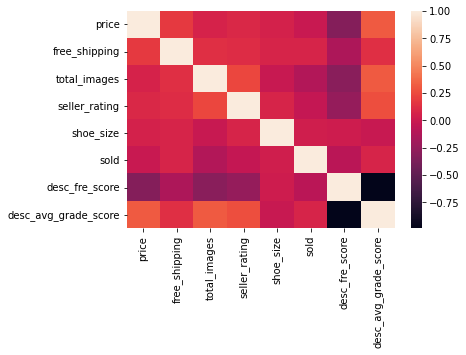

In [59]:
sns.heatmap(df.corr());


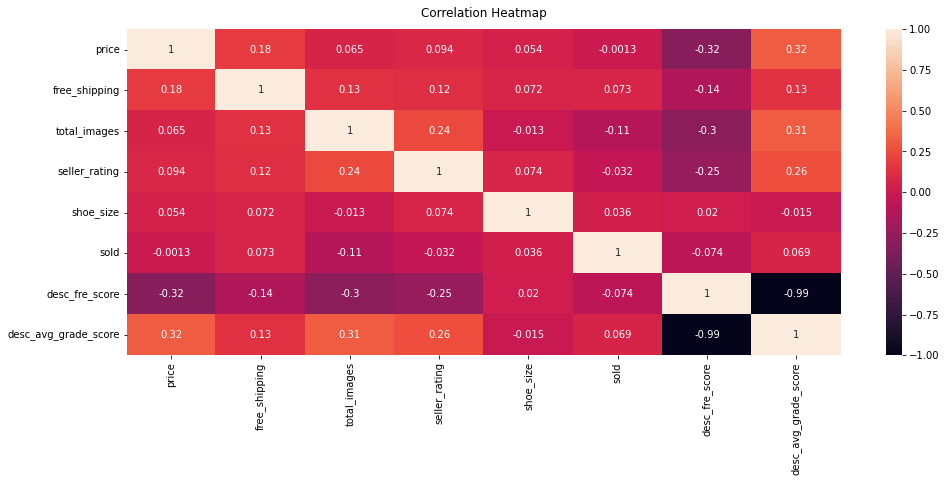

In [61]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

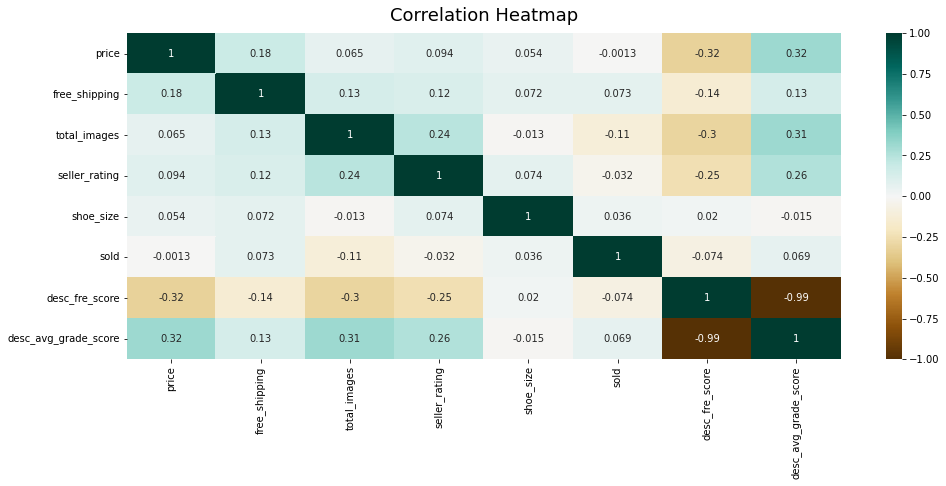

In [62]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

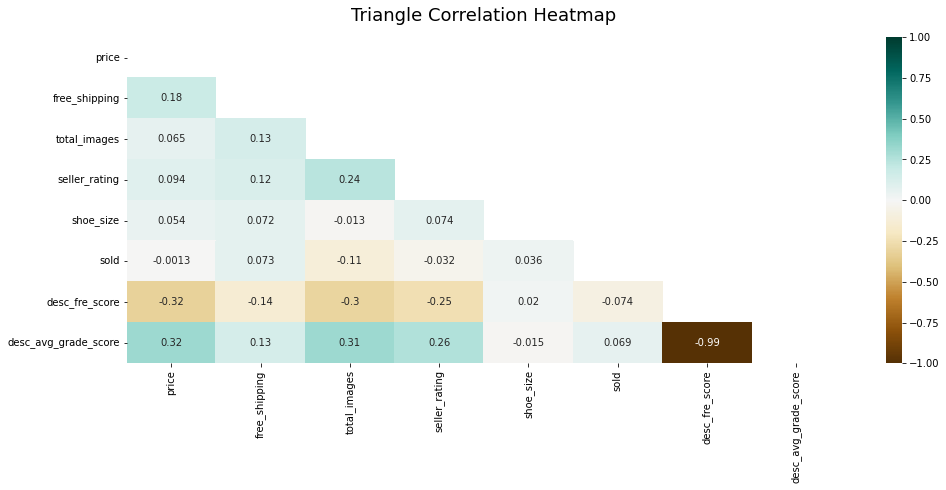

In [65]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

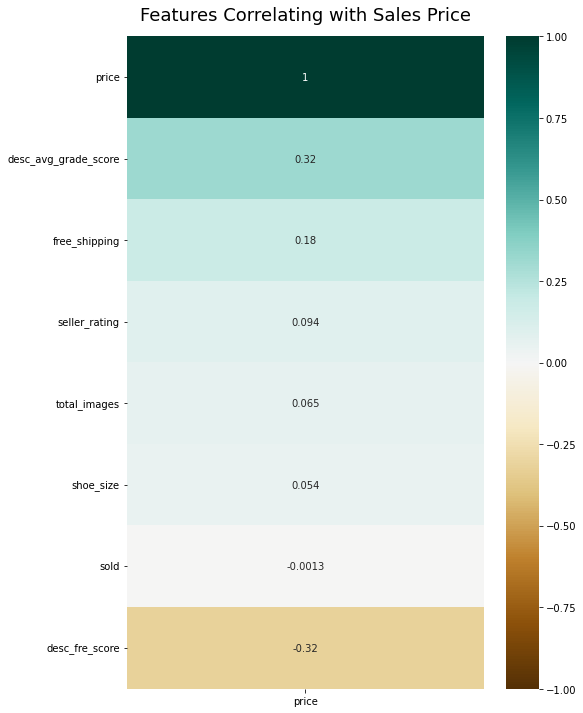

In [66]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);